In [24]:
## 주성분 분석
# PCA 클래스

##### 데이터가 가진 속성 즉, 머신러닝으로 타겟값을 맞추기 위한 특징이 특성
##### 그럼 이미지에선? 하나하나의 픽셀이 특성이고, 이러한 특성을 차원이라고도 부름
##### 10000개의 특성은 10000차원이라는건데 이 차원을 줄이면 저장공간을 크게 절약하고 처리속도도 빠름
##### 분산이 가장 큰 방향을 나타내면 대각으로 나타낸다고 가정했을 때, 가장 분산의 방향을 잘 나타내는 것은 길이 주성분
##### 이러한 주성분을 찾아 해당 차원에 대입하는 것이 PCA 

In [25]:
import numpy as np 

fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

In [26]:
fruits_2d[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [27]:
# PCA import
from sklearn.decomposition import PCA

# 주성분 개수 지정
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [28]:
# 찾은 주성분, 원래 차원 확인
print(pca.components_.shape)

(50, 10000)


In [29]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

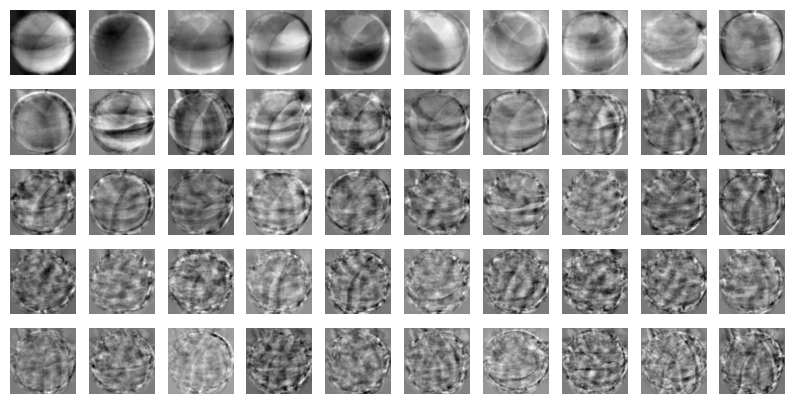

In [30]:
# 찾은 50개의 주성분을 100*100으로 변환
draw_fruits(pca.components_.reshape(-1,100,100))

##### 10000개의 차원을 50개로 줄인다는 것은, 완전히 새로운 특성을 만드는 것과 같음
##### 즉, (1번 주성분) 모양, (2번 주성분) 빛번짐(색상), (3번 주성분) 갖아 하얀 부분 이런식으로
##### 10000개의 복잡한 정보를 50개의 핵심정보로 요약

In [31]:
# 찾은 주성분으로 차원 축소
fruits_pca=pca.transform(fruits_2d)

In [32]:
# 형태 확인
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [33]:
# 10000개의 특성을 50개로 줄였다는 것은 1/200인데 분류가 가능한가?
# 10000개의 차원에 50개를 대입함
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse)

[[1.07104438 1.05629146 1.0787695  ... 1.         1.         1.        ]
 [1.01253868 0.9966167  1.01903278 ... 1.         1.         1.        ]
 [1.06164901 1.05884678 1.07474904 ... 1.         1.         1.        ]
 ...
 [0.98089147 0.91114839 0.94924857 ... 1.         1.         1.        ]
 [0.5743054  0.94674211 0.72492107 ... 1.         1.         1.        ]
 [0.98688719 0.9839043  1.01278822 ... 1.         1.         1.        ]]


In [34]:
# 재배열
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)


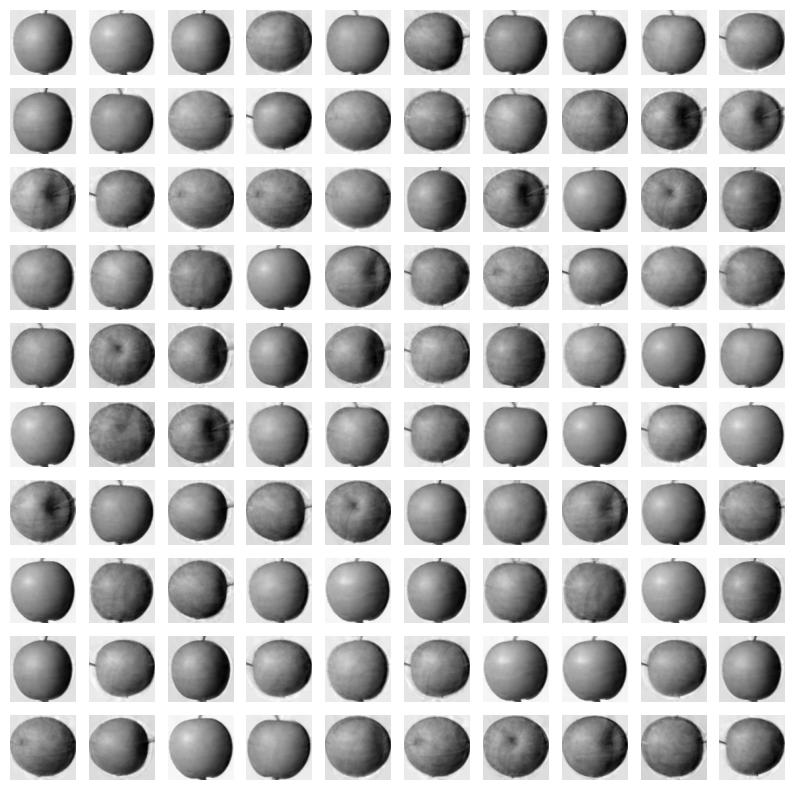

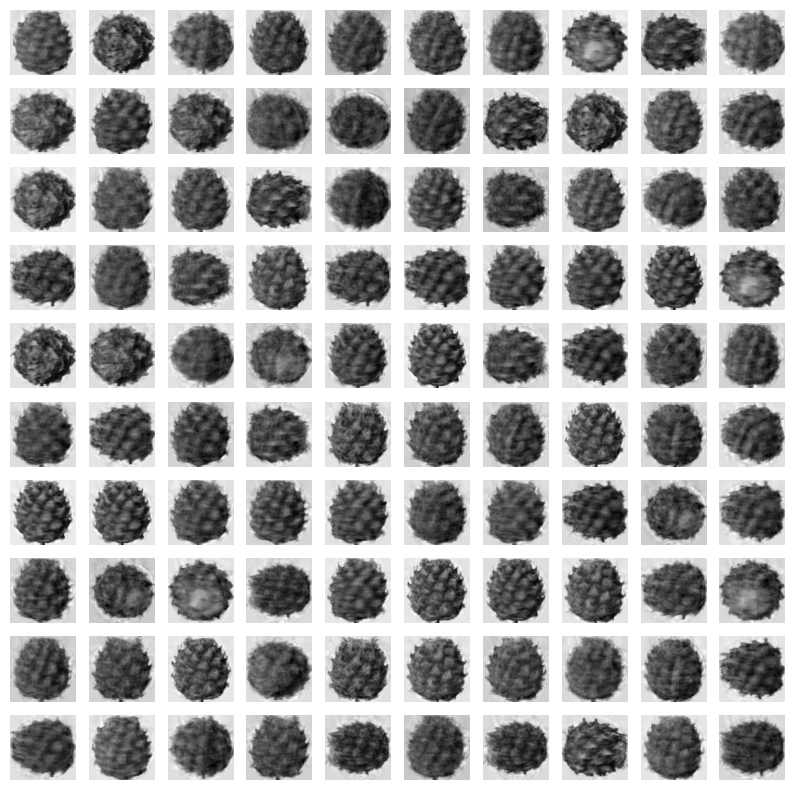

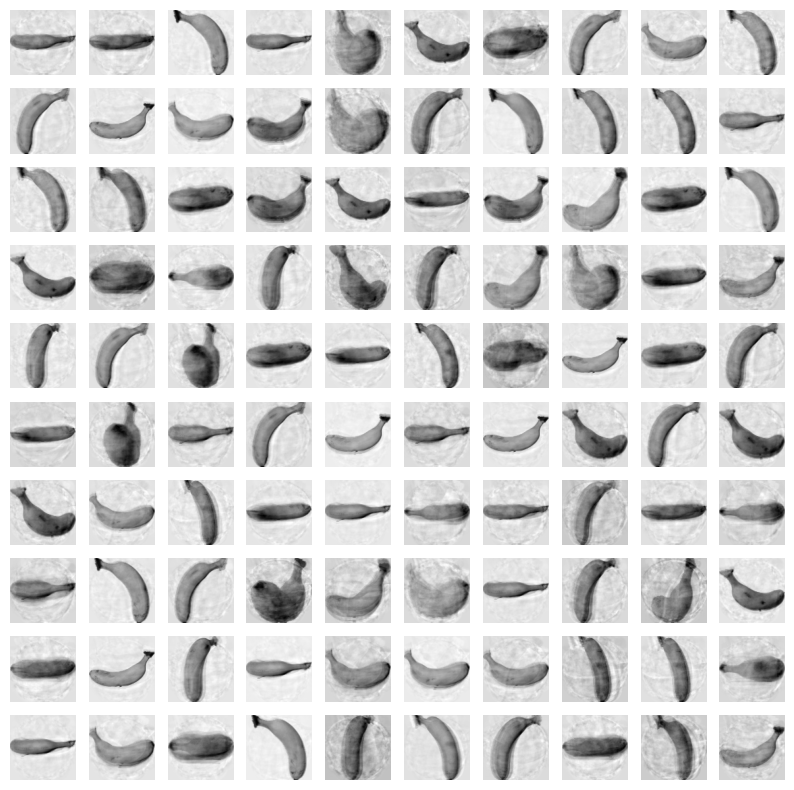

In [35]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('')

In [36]:
# 설명된 분산
# 주성분 50개가 원래 10000개의 데이터 분산을 얼마나 잘 나타내는지 기록한 값

In [37]:
# pca 객체의 explained_variance_ratio에는 각 주성분의 설명된 분산 비율이 기록되어 있음
# 당연히 첫번째 주성분이 가장 큰 설명된 분산 값을 가지고 있음
# 그리고 이 50개의 분산 비율값을 더하면 50개의 주성분이 원본을 얼마나 잘 투영하는지 정량적으로 나타낼 수 있음
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486381 0.00480347 0.00447836 0.00437315 0.00408041 0.00389472
 0.00372434 0.00359284 0.00331438 0.00317846 0.00304324 0.00303721
 0.0028871  0.00275888 0.00264912 0.00255611 0.00252148 0.00247389
 0.00239256 0.0023051  0.00222182 0.00216956 0.00213069 0.00196063
 0.00193134 0.00190755 0.00185695 0.00181771 0.00173945 0.00167817
 0.00160067 0.00158278]
0.9215189120191113


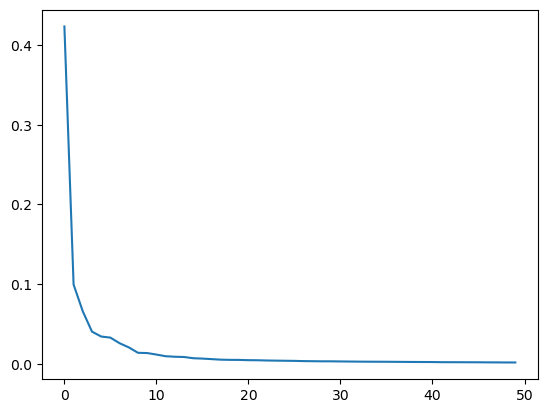

In [38]:
plt.plot(pca.explained_variance_ratio_)

In [39]:
# 비지도 학습 끝판왕 PCA 활용 (비지도 6, 지도 4 비율로 사용)
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()


In [40]:
# 사용 모델이 지도학습이기 때문에 타깃값 설정해줌
target=np.array([0]*100+[1]*100+[2]*100)

In [41]:
# 원본 데이터(10000개 차원)으로 훈련-검증 시행
from sklearn.model_selection import cross_validate

scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.37644200325012206


In [42]:
# pca 데이터셋으로 훈련-검증 시행
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.010504865646362304


In [44]:
# n_components를 갯수 지정 -> 비율로 지정
pca=PCA(n_components=0.5)  # 분산 투영 비율 0.5
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [45]:
# 2개의 차원만으로 원본데이터 분산의 50%이상을 표현 할 수 있다.
print(pca.n_components_)

2


In [46]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)    

(300, 2)


In [47]:
# pca 데이터셋으로 훈련-검증 시행
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.016997289657592774


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

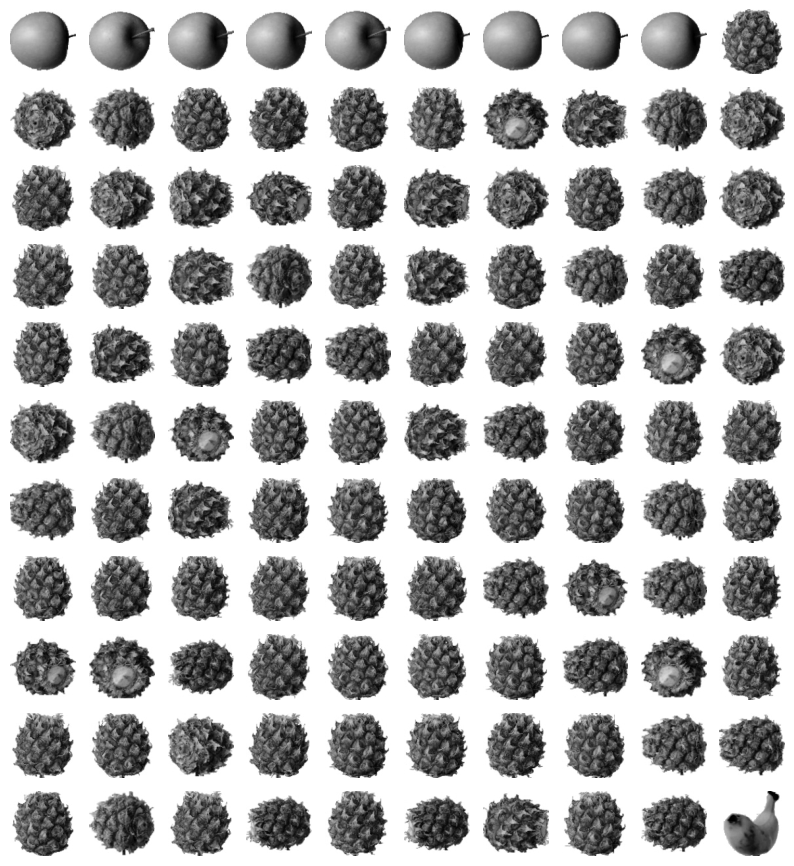

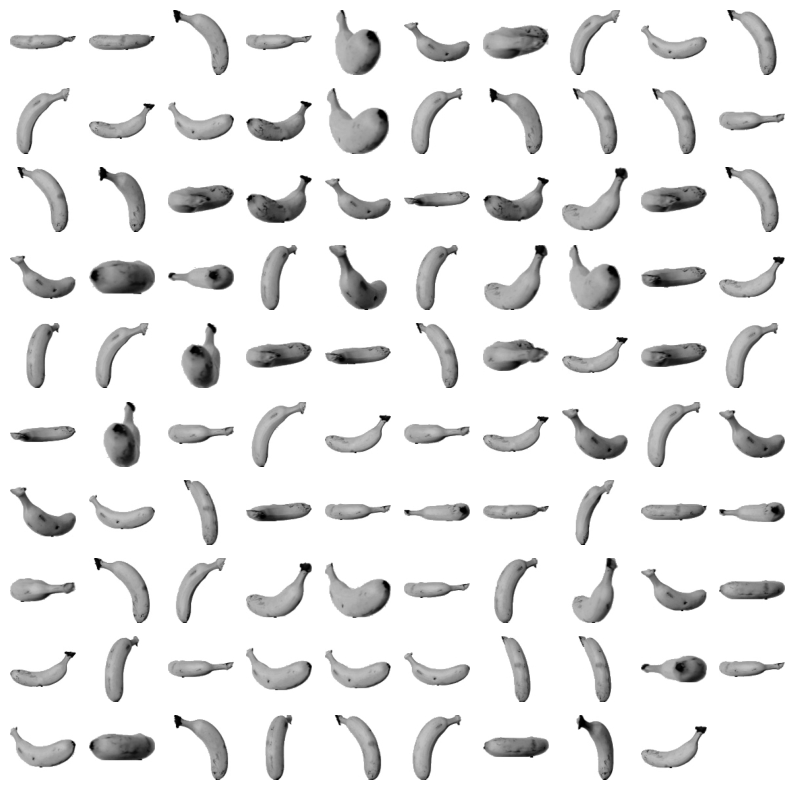

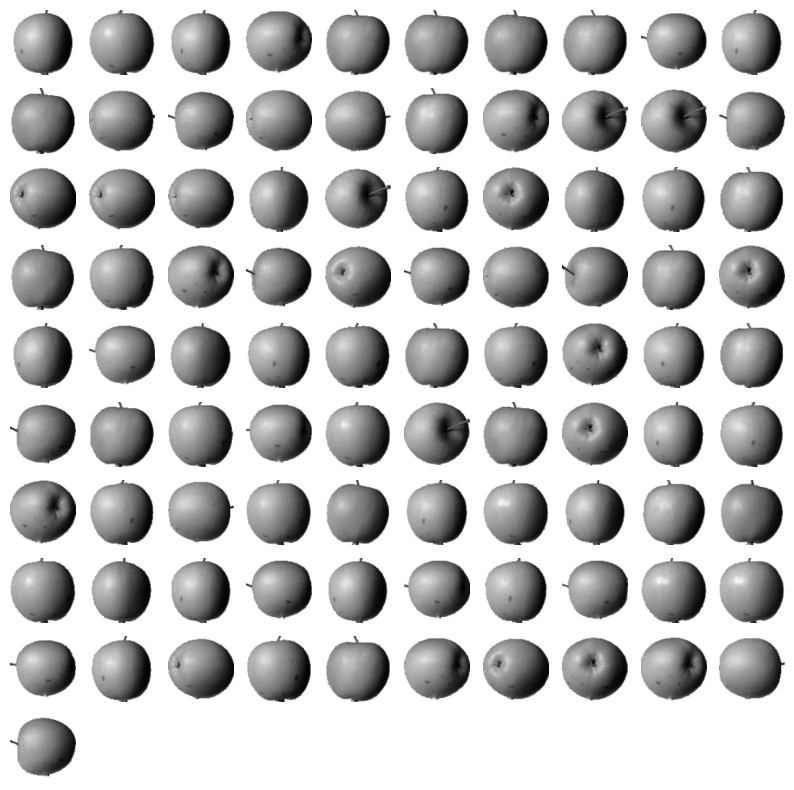

In [49]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('')

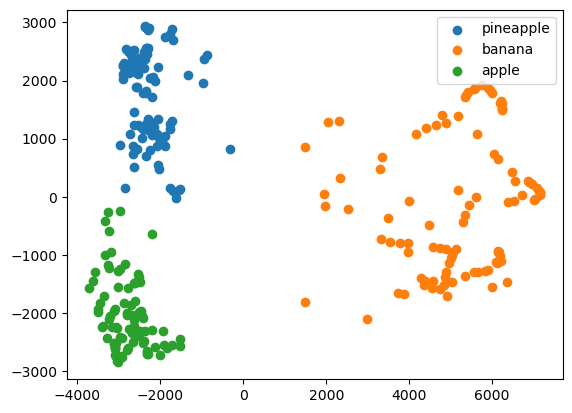

In [50]:
# 2차원 공간 안에 사과,바나나,파인애플 벡터 표시
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()